### Equipe 3_Cas Pratique Machine Learning

### Chargement des diverses librairies 

In [1]:
# Importation des bibliothéques 

%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Importation des algorithmes 

In [2]:
from sklearn import datasets, linear_model #sklearn est une mine d'or pour faire du machine learning dans Python.
from sklearn.metrics import mean_squared_error

### Chargement du jeu de données

In [3]:
df = pd.read_csv (r"C:\Users\penel\Desktop\equipe3_linear_regression_dataset.csv")

In [6]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
#selection de la première colonne de notre dataset (la taille de la population)
X = df.iloc[0:len(df),0]
#selection de deuxième colonne de notre dataset (le profits effectué)
Y = df.iloc[0:len(df),1] 

In [8]:
X.shape

(97,)

In [9]:
X=X.values.reshape(-1,1)

In [10]:
X.shape

(97, 1)

In [11]:
#Regardons à quoi ressemble le jeu de données en question.
df.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [12]:
#Quelle est la taille du jeu de données?
#Ici, nous avons ...... rangées et 2 colonnes.
df.shape

(97, 2)

In [13]:
#Ici, je vérifie que je n'ai pas de données manquantes.
df.isnull().sum()

Population    0
Profit        0
dtype: int64

In [14]:
df.describe()
#Ici, je sors les valeurs clés pour chacune de mes données. 

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Visualisation du jeu de données

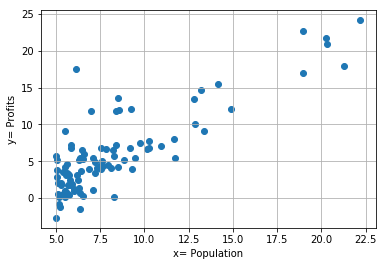

In [15]:
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.xlabel ("x= Population")
plt.ylabel ("y= Profits")
plt.show() 

## 1ère methode : Application d'un modèle de régression linéaire : SciPy avec la fonction linregress()


#### par mesure de simplificité, les données serviront à l'entrainement et au jeu de test. l''idée est de trouver une fonction prédictive F(X) qui prendra en entrée une taille de population, et produira en sortie une estimation du gain espéré(Y). L’idée du jeu est que la prédiction soit proche de la valeur observée F(X)=~Y

#### Modèle obtenu : calcul des coefficients

* $slope$ : représente la "pente" de la line de prédiction 
* $intercept$ : représente le point d'intersection avec l'axe des ordonnées


#### les valeurs de $slope$ et $intercept$ peuvent variées un peu en fonction des valeurs calculées par la fonction linregress et la précision de nombres flottants.

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [20]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(77, 1)
(20, 1)
(77,)
(20,)


In [21]:
# On cree une instance de notre modele
lm1 = linear_model.LinearRegression()



#On fit/installe notre modele sur notre jeu de donnees.
lm1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
pred1 = lm1.predict(X_test)
(lm1.predict(X_test[0:10]))

array([22.66492686,  2.22914165,  2.09845748,  3.54589731,  1.94781662,
        7.84508459, 19.67786014, 10.34198911,  2.62029289,  3.13453187])

In [23]:
print (np.sqrt(mean_squared_error(y_test, pred1)))

3.9635038094803425


In [24]:
score1=lm1.score(X_test,y_test)
print (score1)

0.5003441133385782


In [ ]:
#Mon code s'arrete la

#### Ecriture de la fonction de prédiction avec Python

avec la fonction des coefficients obtenus, on peut écrire la fonction de prédition : Y=F(x)

In [ ]:
# définition des observations
def predict(x):
    return slope * x + intercept

### visualisation de la fonction de prédiction 
on pourra voir visuellement à comment la fonction de prédiction "approche" le jeu d'entrainement et qu'elle est par conséquent une bonne fonction de prédiction.


In [ ]:
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
fitLine = predict(X)
plt.plot(X, fitLine, c='r')
plt.xlabel ("x= Population")
plt.ylabel ("y= Profits")
plt.show()

### Prédiction d'une nouvelle observation

On voit que pour pour la valeur x = 22.5, la valeur de y pour est environ 25. Utilisons la fonction $predict$ pour trouver une estimation du profit pour une population de $F(x = 17.5)$

In [ ]:
predict(17.5)


### > Interpretation

### 2ième methode : Exploration, Test et Installation de modèle

### Definition de la variable à prédire

In [ ]:
X = df.iloc[0:len(df),0]
y = df.iloc[0:len(df),1]  #Definissons y comme etant notre variable a predire. y ici est une donnee quantitative mesurant le profit en fonction de la population.
df.head(5)

### Exploration des donnees

In [ ]:
sns.pairplot(df, kind="reg") #Observons la linearite ou pas de toutes nos variables les unes comparees aux autres.

In [ ]:
df.describe()

### Demarrage de la phase de test:

### Installation du modele de regression lineaire sur le jeu de donnees:

In [ ]:
print (lm1.coef_)#Interpreter la signification des coefficients
# + 1 an, se traduit par une augmentation de 37 de l'indice diabetique/la progression de la maladie apres 1 an.
# une augmentation d'un point d'indice de masse corporelle se traduit par une augmentation de 542 de l'indice diabetique.

In [ ]:
print (lm1.intercept_) # sans aucune influence des facteurs sexe, age etc...l'indice diabetique est de 151.

In [ ]:
pred1 = lm1.predict([[X_test]])
#Ici, on sort les 10 premieres valeurs predites par notre learning post apprentissage...
print(lm1.predict(X_test[0:10]))

### Evaluation du modele:

### 1) Calcul de l'erreur du modele:

In [ ]:
print (np.sqrt(mean_squared_error(y_test, pred1)))

### 2) Calcul du score du modele:

In [ ]:
score1=lm1.score(X_test,y_test)
print (score1)

### 3) Calcul de l'erreur du modele de base:

In [ ]:
#baseline prediction
#Ici, le modele de base/notre benchmark est le modele qui va predire que toute nouvelle observation la moyenne 
baseline=np.mean(y_test)
baseline

In [ ]:
baseline_pred=np.empty(len(y_test))# cree un nouveau tableau
baseline_pred.fill(baseline) #rempli avec predictions
print(np.sqrt(mean_squared_error(y_test,baseline_pred)))

In [ ]:
print(y_test, baseline_pred)
#Ici, on sort les valeurs predies versus la moyenne

###  >Interpretation